In [ ]:
with open('./h2s/'+filename, "r") as fo:
    traj = fo.read()
    timesteps = traj.split("ITEM: TIMESTEP")[1:]
    finalstep = int(timesteps[-1].split('\n')[1])
    Natom = int(timesteps[1].split("\n")[3])

    vtraj = [[] for iatom in range(Natom)]

    for timestep in timesteps:
        velocities = timestep.split("ITEM: ATOMS id mass vx vy vz")[1]
        velocities = np.loadtxt(velocities.split("\n"), usecols=(2,3,4))
        for iatom in range(Natom):
            vtraj[iatom].append(velocities[iatom])

    vtraj = np.array(vtraj)    

This script first read the position file (with the extension of .xyz) containing the cartesian coordinates, whcih is generated from the CP2K/QuickStep simulations. And then calculate the time derivative of each component (x, y, z), yielding the velocities of each compoent (v_i, here i = x, y, z). After computing the autocorrelation of each velocity component, v_i, the VACF data array obtained. By performing the FFT on the VACF, the final spectrum produced. And then plotted on the graph panel by using the Matplotlib module.


In [38]:
from scipy import signal
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
filename = 'velocities.trj'
delta_t = 0.25 * 1e-15 # en unités de femtosecondes

In [ ]:
!head -n40 ./h2s/velocities.trj

In [35]:
def read(filename):
    with open('./traj/'+filename, "r") as fo:
        traj = fo.read()
        timesteps = traj.split("ITEM: TIMESTEP")[1:]
        finalstep = int(timesteps[-1].split('\n')[1])
        Natom = int(timesteps[1].split("\n")[3])

        vtraj = [[] for istep in range(finalstep)]

        for timestep in timesteps:
            velocities = timestep.split("ITEM: ATOMS id mass vx vy vz")[1]
            velocities = np.loadtxt(velocities.split("\n"), usecols=(2,3,4))
            for iatom in range(Natom):
                vtraj[iatom].append(velocities[iatom])

        vtraj = np.array(vtraj)     
    return finalstep, Natom, vtraj

finalstep, Natom, vtraj = read(filename)

print (Natom)

#print (len(vtraj)) 4000 --> number of timesteps --> OK!!!
#print (vtraj[0][0]) atom 0, timestep 0
#print (vtraj[1][0]) atom 1, timestep 0
#print (vtraj[2][0]) atom 2, timestep 0
#print (vtraj[2][0][0]) atom 2, timestep 0, vx coordinate

#for i in range(len(vtraj)):
    #print (vtraj[0][i])
    #print (vtraj[0][i][0]) --> all x coordinates of atom 0 for each timestep
    #print (np.linalg.norm(vtraj[0][i]))
    # works flawlessly --> print vx vy vz coordinates for atom 0 for each timestep
    
#for i in range(3):
#    for j in range(len(vtraj)):
#        print (vtraj[i][j][0]) --> print vx coordinate for atom i for each j timestep

5


In [32]:
def window(data):
    sigma = 2*math.sqrt(2*math.log(2))
    std = float(4000)
    return signal.gaussian(len(data), std/sigma, sym=False)

window(vtraj)

array([ 0.5       ,  0.50034661,  0.50069328, ...,  0.50104002,
        0.50069328,  0.50034661])

In [33]:
def zero_padding(sample_data):
    return int(2**math.ceil(math.log(len(sample_data), 2)))

/usr/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


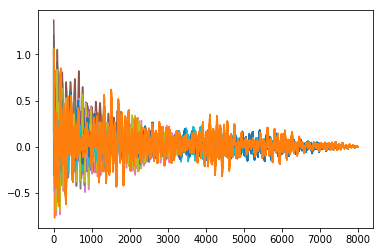

In [56]:
def calc_ACF(array_1D):
    yu = array_1D - np.mean(array_1D, axis=0)
    ynorm = np.sum(np.power(yu, 2), axis=0)
    acf = signal.fftconvolve(array_1D, array_1D[::-1], mode='full')[len(array_1D)-1:]/ynorm
    return acf

vtraj_x_0 = []
vtraj_y_0 = []
vtraj_z_0 = []
vtraj_x_1 = []
vtraj_y_1 = []
vtraj_z_1 = []
vtraj_x_2 = []
vtraj_y_2 = []
vtraj_z_2 = []
vtraj_x_3 = []
vtraj_y_3 = []
vtraj_z_3 = []
vtraj_x_4 = []
vtraj_y_4 = []
vtraj_z_4 = []



for i in range(len(vtraj)):
    vtraj_x_0.append(vtraj[0][i][0])
    vtraj_y_0.append(vtraj[0][i][1])
    vtraj_z_0.append(vtraj[0][i][2])
    
    vtraj_x_1.append(vtraj[1][i][0])
    vtraj_y_1.append(vtraj[1][i][1])
    vtraj_z_1.append(vtraj[1][i][2])

    vtraj_x_2.append(vtraj[2][i][0])
    vtraj_y_2.append(vtraj[2][i][1])
    vtraj_z_2.append(vtraj[2][i][2])
    
    vtraj_x_3.append(vtraj[3][i][0])
    vtraj_y_3.append(vtraj[3][i][1])
    vtraj_z_3.append(vtraj[3][i][2])
    
    vtraj_x_3.append(vtraj[4][i][0])
    vtraj_y_3.append(vtraj[4][i][1])
    vtraj_z_3.append(vtraj[4][i][2])

    
plt.plot(calc_ACF(vtraj_x_0))
plt.plot(calc_ACF(vtraj_y_0))
plt.plot(calc_ACF(vtraj_z_0))

plt.plot(calc_ACF(vtraj_x_1))
plt.plot(calc_ACF(vtraj_y_1))
plt.plot(calc_ACF(vtraj_z_1))

plt.plot(calc_ACF(vtraj_x_2))
plt.plot(calc_ACF(vtraj_y_2))
plt.plot(calc_ACF(vtraj_z_2))

plt.plot(calc_ACF(vtraj_x_3))
plt.plot(calc_ACF(vtraj_y_3))
plt.plot(calc_ACF(vtraj_z_3))

plt.plot(calc_ACF(vtraj_x_4))
plt.plot(calc_ACF(vtraj_y_4))
plt.plot(calc_ACF(vtraj_z_4))


In [57]:
def calc_FFT(array_1D, window):
    WE = sum(window)/len(array_1D)
    wf = window/WE
    sig = array_1D * wf
    N = zero_padding(sig)
    yfft = np.fft.fft(sig, N, axis=0)/len(sig)
    return np.square(np.absolute(yfft))

In [77]:
w = window(vtraj)
acf = calc_ACF(vtraj_x)
yfft = calc_FFT(acf, w)


c = 2.9979245899e10 
wavenumber = np.fft.fftfreq(len(fft_sq), delta_t*c)[0:int(len(fft_sq)/2)]
intensity = fft_sq[0:int(len(fft_sq)/2)]
